# Sentiment Analysis

## Classifiying Emotion based on Statements

- Source

Introduction



#### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


import warnings 
warnings.filterwarnings("ignore")


nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sm70\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sm70\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('../data/Emotion_joy_anger.csv')

df.head()

,Comment,Emotion
0,im so full of life i feel appalled,anger
1,ive been really angry with r and i feel like a...,joy
2,i feel jealous becasue i wanted that kind of l...,anger
3,when a friend of mine keeps telling me morbid ...,anger
4,i finally fell asleep feeling angry useless an...,anger


In [5]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
Name: count, dtype: int64

In [6]:
# df = df[df['Emotion'] != 'fear'].reset_index(drop=True)
# df['Emotion'].value_counts()

#### Saving the Dataframe

In [7]:
# Saving the dataframe 
df.to_csv('Emotion_joy_anger.csv', index=False)

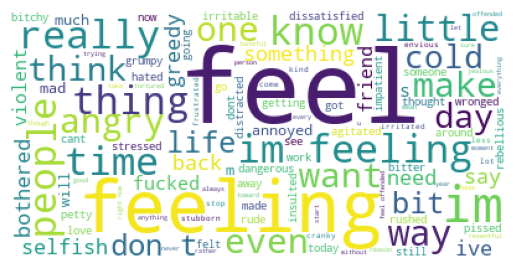

In [8]:
anger = df[df['Emotion'] == 'anger']

text_anger = ''
for line in anger.Comment:
    text_anger += line + ' '
    
wordCloudAnger = WordCloud(background_color='white').generate(text_anger)
plt.imshow(wordCloudAnger)
plt.axis('off')
plt.show()


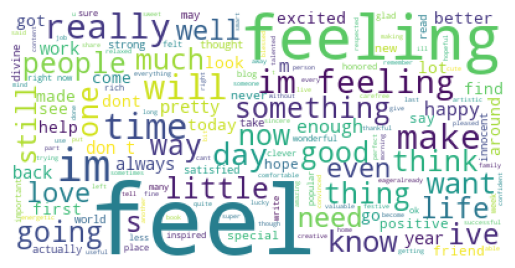

In [9]:
joy = df[df['Emotion'] == 'joy']

text_joy = ''
for line in joy.Comment:
    text_joy += line + ' '
    
wordCloudJoy = WordCloud(background_color='white').generate(text_joy)
plt.imshow(wordCloudJoy)
plt.axis('off')
plt.show()

In [10]:
df.describe()

,Comment,Emotion
count,4000,4000
unique,4000,2
top,im so full of life i feel appalled,anger
freq,1,2000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  4000 non-null   object
 1   Emotion  4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


## Adding some features

### Number of characters

In [12]:
df['num_characters'] = df['Comment'].str.len()

### Number of sentences

In [13]:
# important libraries to count sentences


In [14]:
df['num_sentences'] = df['Comment'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['num_sentences'].value_counts()

num_sentences
1    4000
Name: count, dtype: int64

Becasue `num_sentences` has only one value we can simply drop the column as it will not be helpfull at all. 

In [15]:
# drop num_sentences
df.drop(['num_sentences'], axis=1, inplace=True)
df.head()

,Comment,Emotion,num_characters
0,im so full of life i feel appalled,anger,34
1,ive been really angry with r and i feel like a...,joy,89
2,i feel jealous becasue i wanted that kind of l...,anger,105
3,when a friend of mine keeps telling me morbid ...,anger,77
4,i finally fell asleep feeling angry useless an...,anger,69


## Text Preprocessing

### Lowercasing

In [16]:
df['lowercase_comment'] = df['Comment'].str.lower()
df.head()

,Comment,Emotion,num_characters,lowercase_comment
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled
1,ive been really angry with r and i feel like a...,joy,89,ive been really angry with r and i feel like a...
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...


### Removing URLs, handles, punctuation and special characters

In [17]:
# function to remove patterns from Kaggler's notebook
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

In [18]:
df['lowercase_comment'] = df['lowercase_comment'].apply(remove_patterns)
df.head()

,Comment,Emotion,num_characters,lowercase_comment
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled
1,ive been really angry with r and i feel like a...,joy,89,ive been really angry with r and i feel like a...
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...


### Tokenization 

Tokenization is essentially the process of breaking down sentences or pieces of text into individual words. These words called 'tokens' and then used for further analysis, lemmatization or for preparing it for tasks like machine learning. 

In [19]:
df['tokens'] = df['lowercase_comment'].apply(word_tokenize) 
df.head()

,Comment,Emotion,num_characters,lowercase_comment,tokens
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled,"[im, so, full, of, life, i, feel, appalled]"
1,ive been really angry with r and i feel like a...,joy,89,ive been really angry with r and i feel like a...,"[ive, been, really, angry, with, r, and, i, fe..."
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...,"[i, feel, jealous, becasue, i, wanted, that, k..."
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...,"[when, a, friend, of, mine, keeps, telling, me..."
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...,"[i, finally, fell, asleep, feeling, angry, use..."


### Stemming 

Stemming is the process of reducing words to their base or root form by removing prefixes or suffixes. For example, the words "running" and "runner" would both be reduced to the stem "run." However, stemming doesn't always produce a correct or complete base word; it sometimes results in words that are misspelled or not actual dictionary words. 

Here we will look at a single instance and apply the stemming technique.

In [20]:
text = df['Comment'][8]
text

'i was feeling at the start didnt want to move much at all was really glad to experience this glimpse into the sort of vibrant energy i will gain through out the year'

In [21]:
stemmer = PorterStemmer()

# we need to tokenize the text first
text_tokens = word_tokenize(text)
# text_tokens

stemmed_words = [stemmer.stem(word) for word in text_tokens]  
stemmed_words

for word in zip(text_tokens, stemmed_words):
    print(word)  


('i', 'i')
('was', 'wa')
('feeling', 'feel')
('at', 'at')
('the', 'the')
('start', 'start')
('didnt', 'didnt')
('want', 'want')
('to', 'to')
('move', 'move')
('much', 'much')
('at', 'at')
('all', 'all')
('was', 'wa')
('really', 'realli')
('glad', 'glad')
('to', 'to')
('experience', 'experi')
('this', 'thi')
('glimpse', 'glimps')
('into', 'into')
('the', 'the')
('sort', 'sort')
('of', 'of')
('vibrant', 'vibrant')
('energy', 'energi')
('i', 'i')
('will', 'will')
('gain', 'gain')
('through', 'through')
('out', 'out')
('the', 'the')
('year', 'year')


Notice that while some words, like "feel," "want," and "move," have their correct root form, other words, such as "was" becoming "wa" or "really" becoming "realli," are misspelled or incomplete. To correct this we can use another technique call **lemmatization**. 

### Stopwords

Although stop words are often removed to reduce noise, in sentiment analysis for mental health, many of these words are critical for capturing context and sentiment accurately. Negations and emotion-related terms, such as "how," "why," and "because," provide valuable insights into the emotional state and reasoning of individuals. Excluding these words can compromise the depth and accuracy of the analysis.

### Lemmatization

While stemming simply removes word endings, lemmatization reduces words to their base or dictionary form (known as a "lemma") by considering the context and the grammatical rules. This process ensures that the resulting word is a valid, meaningful word, not just a truncated form.

The function `get_pos` essestially returns whether the word is a noun, verb etc. This ensures that the correct form is generated when lemmatizing. 

In [22]:
def get_pos(word):
    if word.startswith('J'):
        return wordnet.ADJ
    elif word.startswith('V'):
        return wordnet.VERB
    elif word.startswith('N'):
        return wordnet.NOUN
    elif word.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

The function `lemma_text(text_tokens)` performs lemmatization on a list of tokenized words. It first assigns each word its part-of-speech (POS) tag and then uses these tags to correctly lemmatize each word by converting it to its base or dictionary form.

In [23]:
lemmatizer = WordNetLemmatizer()

def lemma_text(text_tokens):
    word_pos = nltk.pos_tag(text_tokens)
    lemmatized_words = [lemmatizer.lemmatize(wp[0], get_pos(wp[1])) for wp in word_pos]
    return lemmatized_words

In [24]:
df['lemmatized_tokens'] = df['tokens'].apply(lemma_text)
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x)) # join back the tokens into a string
df.head(10)

,Comment,Emotion,num_characters,lowercase_comment,tokens,lemmatized_tokens
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled,"[im, so, full, of, life, i, feel, appalled]",im so full of life i feel appal
1,ive been really angry with r and i feel like a...,joy,89,ive been really angry with r and i feel like a...,"[ive, been, really, angry, with, r, and, i, fe...",ive be really angry with r and i feel like an ...
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...,"[i, feel, jealous, becasue, i, wanted, that, k...",i feel jealous becasue i want that kind of lov...
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...,"[when, a, friend, of, mine, keeps, telling, me...",when a friend of mine keep tell me morbid thin...
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...,"[i, finally, fell, asleep, feeling, angry, use...",i finally fell asleep feel angry useless and s...
5,i feel a bit annoyed and antsy in a good way,anger,44,i feel a bit annoyed and antsy in a good way,"[i, feel, a, bit, annoyed, and, antsy, in, a, ...",i feel a bit annoyed and antsy in a good way
6,i feel like i ve regained another vital part o...,joy,71,i feel like i ve regained another vital part o...,"[i, feel, like, i, ve, regained, another, vita...",i feel like i ve regain another vital part of ...
7,i feel a bit like franz liebkind in the produc...,joy,110,i feel a bit like franz liebkind in the produc...,"[i, feel, a, bit, like, franz, liebkind, in, t...",i feel a bit like franz liebkind in the produc...
8,i was feeling at the start didnt want to move ...,joy,165,i was feeling at the start didnt want to move ...,"[i, was, feeling, at, the, start, didnt, want,...",i be feel at the start didnt want to move much...
9,i do not always find myself feeling thankful b...,joy,191,i do not always find myself feeling thankful b...,"[i, do, not, always, find, myself, feeling, th...",i do not always find myself feel thankful but ...


### Regenerating the word clouds

##### Amger WordCloud

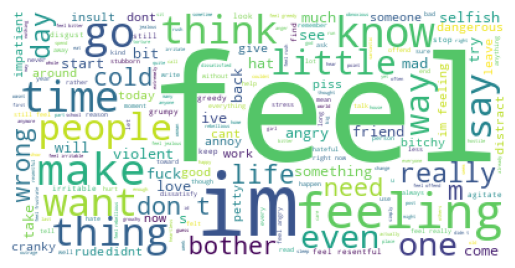

In [25]:
anger_tokens = df[df['Emotion'] == 'anger']

text_anger = ''

for line in anger_tokens.lemmatized_tokens:
    text_anger += line + ' '

wordCloudAnger = WordCloud(background_color='white').generate(text_anger)
plt.imshow(wordCloudAnger)
plt.axis('off')
plt.show()

By seeing the word clouds we can see that feel and feeling are being repeated even though the base is the same for them both. There must be an error somehwere and we shall investigate where it is happening and if we can resovle it. 

Below we will fing in what all rows is the word 'feeling' recurring

In [26]:
search_word = 'feeling'
result = df[df['lemmatized_tokens'].str.contains(search_word)]
print(len(result))
result.head()

401


,Comment,Emotion,num_characters,lowercase_comment,tokens,lemmatized_tokens
16,i am sitting here typing this and wondering wh...,anger,128,i am sitting here typing this and wondering wh...,"[i, am, sitting, here, typing, this, and, wond...",i be sit here type this and wonder where i bel...
17,i stropped about for a bit feeling grumpy beca...,anger,67,i stropped about for a bit feeling grumpy beca...,"[i, stropped, about, for, a, bit, feeling, gru...",i strop about for a bit feeling grumpy because...
18,i have a feeling i shall go mad,anger,31,i have a feeling i shall go mad,"[i, have, a, feeling, i, shall, go, mad]",i have a feeling i shall go mad
20,i got the feeling brig is sincere and has a ve...,joy,187,i got the feeling brig is sincere and has a ve...,"[i, got, the, feeling, brig, is, sincere, and,...",i get the feeling brig be sincere and have a v...
44,i feel rebellious because i don t particularly...,anger,132,i feel rebellious because i don t particularly...,"[i, feel, rebellious, because, i, don, t, part...",i feel rebellious because i don t particularly...


So it is being repeated about 401 times which is quite a lot.

Next we will check the POS tagged to ensure that it is being tagged as a verb. 

In [27]:
s = df.iloc[16] # get the 16th row to check the pos tags

word_pos = nltk.pos_tag(s['tokens'])
word_pos

[('i', 'NN'),
 ('am', 'VBP'),
 ('sitting', 'VBG'),
 ('here', 'RB'),
 ('typing', 'VBG'),
 ('this', 'DT'),
 ('and', 'CC'),
 ('wondering', 'VBG'),
 ('where', 'WRB'),
 ('i', 'NN'),
 ('belong', 'VBP'),
 ('feeling', 'VBG'),
 ('distracted', 'VBD'),
 ('feeling', 'VBG'),
 ('comfortable', 'JJ'),
 ('feeling', 'NN'),
 ('misunderstood', 'NN'),
 ('and', 'CC'),
 ('hurt', 'NN')]

In [28]:
d = df.iloc[44]

word_pos = nltk.pos_tag(d['tokens'])
word_pos

[('i', 'NN'),
 ('feel', 'VBP'),
 ('rebellious', 'JJ'),
 ('because', 'IN'),
 ('i', 'JJ'),
 ('don', 'VBP'),
 ('t', 'JJ'),
 ('particularly', 'RB'),
 ('like', 'IN'),
 ('watching', 'VBG'),
 ('romcoms', 'NNS'),
 ('but', 'CC'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('the', 'DT'),
 ('feeling', 'NN'),
 ('that', 'IN'),
 ('i', 'NN'),
 ('may', 'MD'),
 ('be', 'VB'),
 ('pretty', 'RB'),
 ('good', 'JJ'),
 ('at', 'IN'),
 ('writing', 'VBG'),
 ('them', 'PRP')]

We can see that feeling is being treated as a noun hence it is not being lemmatized correctly. 

For now we will leave it as it is and move on to building machine learning model. This can be considered it as a possible future fix.

##### Joy WordCloud

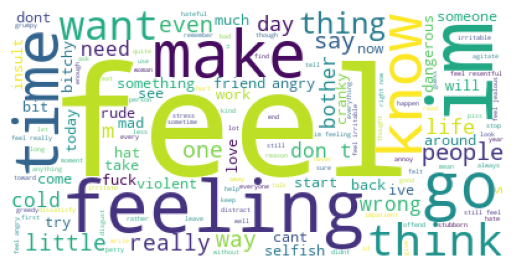

In [29]:
joy_tokens = df[df['Emotion'] == 'anger']

text_joy = ''

for line in joy_tokens.lemmatized_tokens:
    text_joy += line + ' '

wordCloudJoy = WordCloud(background_color='white').generate(text_joy)
plt.imshow(wordCloudJoy)
plt.axis('off')
plt.show()

Similary to the Anger word cloud we can see the feeling and feel are being repeated. 

## Modeling

In [30]:
df.head()

,Comment,Emotion,num_characters,lowercase_comment,tokens,lemmatized_tokens
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled,"[im, so, full, of, life, i, feel, appalled]",im so full of life i feel appal
1,ive been really angry with r and i feel like a...,joy,89,ive been really angry with r and i feel like a...,"[ive, been, really, angry, with, r, and, i, fe...",ive be really angry with r and i feel like an ...
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...,"[i, feel, jealous, becasue, i, wanted, that, k...",i feel jealous becasue i want that kind of lov...
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...,"[when, a, friend, of, mine, keeps, telling, me...",when a friend of mine keep tell me morbid thin...
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...,"[i, finally, fell, asleep, feeling, angry, use...",i finally fell asleep feel angry useless and s...


In [31]:
df[df['Emotion'] == 'anger'].head()

,Comment,Emotion,num_characters,lowercase_comment,tokens,lemmatized_tokens
0,im so full of life i feel appalled,anger,34,im so full of life i feel appalled,"[im, so, full, of, life, i, feel, appalled]",im so full of life i feel appal
2,i feel jealous becasue i wanted that kind of l...,anger,105,i feel jealous becasue i wanted that kind of l...,"[i, feel, jealous, becasue, i, wanted, that, k...",i feel jealous becasue i want that kind of lov...
3,when a friend of mine keeps telling me morbid ...,anger,77,when a friend of mine keeps telling me morbid ...,"[when, a, friend, of, mine, keeps, telling, me...",when a friend of mine keep tell me morbid thin...
4,i finally fell asleep feeling angry useless an...,anger,69,i finally fell asleep feeling angry useless an...,"[i, finally, fell, asleep, feeling, angry, use...",i finally fell asleep feel angry useless and s...
5,i feel a bit annoyed and antsy in a good way,anger,44,i feel a bit annoyed and antsy in a good way,"[i, feel, a, bit, annoyed, and, antsy, in, a, ...",i feel a bit annoyed and antsy in a good way


In [32]:
df['Comment'][4]

'i finally fell asleep feeling angry useless and still full of anxiety'

In [33]:
X = df['lemmatized_tokens']
y = df['Emotion']   

Converting emotions to integers so that the models will be able to interpret them.

In [34]:
y = y.map({'anger': 0, 'joy': 1})


Splitting the data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200,), (800,), (3200,), (800,))

Initializing the TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_matrix = vectorizer.fit_transform(X_train)
X_test_matrix = vectorizer.transform(X_test)

In [37]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### L2-Norm Regularized Logistic Regression 

We can implement L2-regularized log regression model and record AUC and sum of model coefficient magnitudes for complexity measurement. 

In [38]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100]
col_labels = ['C', 'Train AUC', 'Model Complexity - Coef Sum', 'Test AUC']

result_log_L2_arr = []
result_fpr_L2_arr = []
result_tpr_L2_arr = []

for c_value in C_list:
    result_log_L2_list = []
    
    
    # Building the model with the c value
    log_model_L2 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=c_value, penalty='l2')
    log_model_L2.fit(X_train_matrix, y_train)
    
    # Check to make sure 1 is in the second column
    print('Class order: ', log_model_L2.classes_)
    if log_model_L2.classes_[1] == 1:
        print('Correct class selection')
    else:
        print('Incorrect class selection, check clases.')
    
    # Calculate the AUC for the training data
    y_train_pred_proba = log_model_L2.predict_proba(X_train_matrix)
    y_train_pred_proba_1 = y_train_pred_proba[:, 1]  # Only get the probability of class 3
    train_AUC = metrics.roc_auc_score(y_train, y_train_pred_proba_1)
    
    # Calculate the AUC for the test data
    y_test_pred_proba = log_model_L2.predict_proba(X_test_matrix)
    y_test_pred_proba_1 = y_test_pred_proba[:, 1]  # Only get the probability of class 3
    test_AUC = metrics.roc_auc_score(y_test, y_test_pred_proba_1)
    
    # Calculate fpr and tpr for the ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba_1, pos_label=1)
    
    # Compute complexity of the model
    complexity_coef_sum = np.sum(np.abs(log_model_L2.coef_))
    
    # Complie the results 
    result_log_L2_list = [c_value, train_AUC, complexity_coef_sum, test_AUC]
    result_log_L2_arr.append(result_log_L2_list)
    result_fpr_L2_arr.append(list(fpr))
    result_tpr_L2_arr.append(list(tpr))
    
    
    print('C value', c_value)
    print('Model Complecity', complexity_coef_sum)
    print('Train AUC', train_AUC)
    print('Test AUC', test_AUC)
    print('-----------------------------------------')
    
df_log_L2 = pd.DataFrame(result_log_L2_arr, columns=col_labels)
df_log_L2

Class order:  [0 1]
Correct class selection
C value 0.001
Model Complecity 4.763379790793393
Train AUC 0.9902956467927971
Test AUC 0.9341165860868258
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 0.01
Model Complecity 47.34671225423951
Train AUC 0.990300334886134
Test AUC 0.9336656729878003
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 0.1
Model Complecity 447.9226763811461
Train AUC 0.9939429834088378
Test AUC 0.9421328189583907
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 1
Model Complecity 3114.7864821115327
Train AUC 0.9997730181476093
Test AUC 0.9690373005335805
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 10
Model Complecity 10593.413696071739
Train AUC 1.0
Test AUC 0.98258974423207
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 100
Model Comp

,C,Train AUC,Model Complexity - Coef Sum,Test AUC
0,0.001,0.990296,4.763380,0.934117
1,0.010,0.990300,47.346712,0.933666
2,0.100,0.993943,447.922676,0.942133
3,1.000,0.999773,3114.786482,0.969037
4,10.000,1.000000,10593.413696,0.982590
5,100.000,1.000000,20646.106854,0.985533


### Visualizing AUC curves for different C-Values 

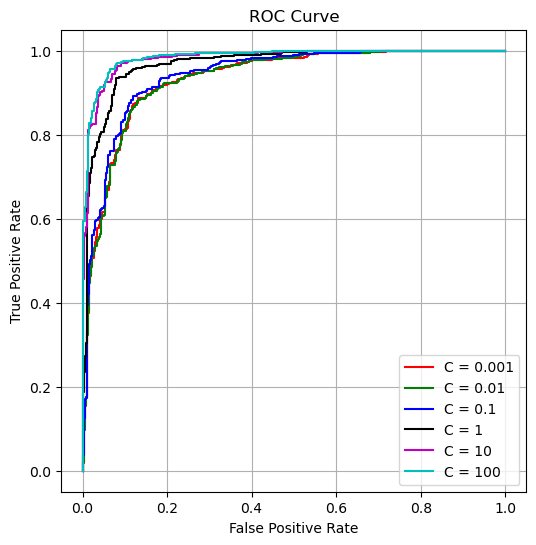

In [39]:
colours=['r','g','b','k','m','c']
plt.figure(figsize=(6, 6))
for i in range(len(result_fpr_L2_arr)):
    plt.plot(result_fpr_L2_arr[i], result_tpr_L2_arr[i], label='C = ' + str(C_list[i]), color=colours[i])  
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    
plt.title('ROC Curve')
plt.grid(True)
plt.show() 

### L1-Regularized Logistic Regression

In [40]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100]
col_labels = ['C', 'Train AUC', 'Model Complexity - Coef Sum', 'Test AUC']

result_log_L1_arr = []
result_fpr_L1_arr = []
result_tpr_L1_arr = []

for c_value in C_list:
    result_log_L1_list = []
    
    
    # Building the model with the c value
    log_model_L1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=c_value, penalty='l1')
    log_model_L1.fit(X_train_matrix, y_train)
    
    # Check to make sure 3 is in the second column
    print('Class order: ', log_model_L1.classes_)
    if log_model_L1.classes_[1] == 1:
        print('Correct class selection')
    else:
        print('Incorrect class selection, check clases.')
    
    # Calculate the AUC for the training data
    y_train_pred_proba = log_model_L1.predict_proba(X_train_matrix)
    y_train_pred_proba_1 = y_train_pred_proba[:, 1]  # Only get the probability of class 3
    train_AUC = metrics.roc_auc_score(y_train, y_train_pred_proba_1)
    
    # Calculate the AUC for the test data
    y_test_pred_proba = log_model_L1.predict_proba(X_test_matrix)
    y_test_pred_proba_1 = y_test_pred_proba[:, 1]  # Only get the probability of class 3
    test_AUC = metrics.roc_auc_score(y_test, y_test_pred_proba_1)
    
    # Calculate fpr and tpr for the ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba_1, pos_label=1)
    
    # Compute complexity of the model
    complexity_coef_sum = np.sum(np.abs(log_model_L1.coef_))
    
    # Complie the results 
    result_log_L1_list = [c_value, train_AUC, complexity_coef_sum, test_AUC]
    result_log_L1_arr.append(result_log_L1_list)
    result_fpr_L1_arr.append(list(fpr))
    result_tpr_L1_arr.append(list(tpr))
    
    
    print('C value', c_value)
    print('Model Complecity', complexity_coef_sum)
    print('Train AUC', train_AUC)
    print('Test AUC', test_AUC)
    print('-----------------------------------------')
    
df_log_L1 = pd.DataFrame(result_log_L1_arr, columns=col_labels)
df_log_L1

Class order:  [0 1]
Correct class selection
C value 0.001
Model Complecity 0.0
Train AUC 0.5
Test AUC 0.5
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 0.01
Model Complecity 0.0
Train AUC 0.5
Test AUC 0.5
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 0.1
Model Complecity 0.0
Train AUC 0.5
Test AUC 0.5
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 1
Model Complecity 613.3987675529968
Train AUC 0.9759492998332602
Test AUC 0.9719306595856612
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 10
Model Complecity 3456.724376073967
Train AUC 0.9999972652788869
Test AUC 0.989140509531802
-----------------------------------------
Class order:  [0 1]
Correct class selection
C value 100
Model Complecity 7388.190309742275
Train AUC 1.0
Test AUC 0.9901174879130239
-----------------------------------------


,C,Train AUC,Model Complexity - Coef Sum,Test AUC
0,0.001,0.500000,0.000000,0.500000
1,0.010,0.500000,0.000000,0.500000
2,0.100,0.500000,0.000000,0.500000
3,1.000,0.975949,613.398768,0.971931
4,10.000,0.999997,3456.724376,0.989141
5,100.000,1.000000,7388.190310,0.990117


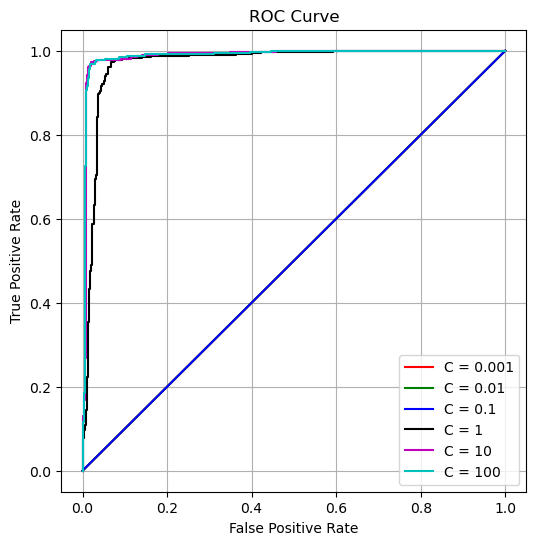

In [41]:
colours=['r','g','b','k','m','c']
plt.figure(figsize=(6, 6))
for i in range(len(result_fpr_L1_arr)):
    plt.plot(result_fpr_L1_arr[i], result_tpr_L1_arr[i], label='C = ' + str(C_list[i]), color=colours[i])  
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    
plt.title('ROC Curve')
plt.grid(True)
plt.show() 

### Choosing the model

Before we pick a model we must understand that there needs to be a balance between the model performance and complexity because a highly complex model may fit the training data too closely, which can lead to overfitting, while a simpler model can not capture any patterns resulting in underfitting. The goal is to pick model that generalizies well and is robust. 

Based on both the Logistic Regression results tables, there is an option between C = 1.000 for L2 regularization and C = 1.000 for L1 regularization that is feasible. Both provide a good balance between model performance and complexity:

- L2 Regularized Logistic Regression (C = 1.000):
    - Test AUC: 0.969037
    - Model Complexity: 3,114
    
- L1 Regularized Logistic Regression (C = 1.000):
    - Test AUC: 0.971931
    - Model Complexity: 613

As both options provide solid performance, the model that we are going with is the L1 Regularized model as its performace is higher and the complexity is much lower than the other model.  

In [42]:
log_model_best_L1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=1, penalty='l1')
log_model_best_L1.fit(X_train_matrix, y_train)   

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [43]:
# Obtain the features and their magnitudes
df_best_features_L1 = pd.DataFrame({'Coefficient':log_model_best_L1.coef_.tolist()[0], 'Feature Name': vectorizer.get_feature_names_out()})
df_best_features_L1['Coef_Magnitude'] = abs(df_best_features_L1['Coefficient'])
df_best_features_L1.sort_values(by='Coef_Magnitude', ascending=False).head(10)

,Coefficient,Feature Name,Coef_Magnitude
14766,-15.669065,irritable,15.669065
4427,-15.608324,bother,15.608324
23497,-15.529627,resentful,15.529627
23800,-15.509240,rude,15.509240
24387,-15.259881,selfish,15.259881
6858,-15.139693,dangerous,15.139693
11850,-15.028425,greedy,15.028425
31612,-14.529557,violent,14.529557
1974,-13.072912,angry,13.072912
21589,-13.067110,petty,13.067110
